In [3]:
import numpy as np
import math
import pandas as pd
from scipy import special
from scipy.stats import norm
from scipy import optimize
import matplotlib.pyplot as plt

## [IV] - $\textbf{Beam Intensity Profile of Filtered Beam}$

In [142]:
#v_b = 0.7312 * 10**-3 

v_b = 0.0007312 #beam scanner speed m/s

iv = pd.read_csv('StaunchEscoIV.dat',sep='\s+', header=None, skiprows=1)

time = iv[0][5:].values
voltage = iv[1][5:].values

t = np.ndarray.tolist(time)
v = np.ndarray.tolist(voltage)


tf = map(float,t)
vf = map(float,v)

tf = list(tf)
vf = list(vf)

#plt.plot(tf,vf,'r:')
#plt.xlabel('time (s)')
#plt.ylabel('relative photometer intensity (a.u.)')
#plt.title('Laser Optics IV')

###  1 - Converting time data to distance

In [143]:
#convert time to distance

d1 = [tf * v_b for tf in tf]
#d1 = map(lambda x: v_b * x,tf)
#plt.plot(d1,vf)

### Fitting Filtered Beam Data to Gaussian Curve

In [144]:
xvar = np.linspace(0,31,num=1801)


def gaussian(xvar, amplitude, mean, stddev):
    return amplitude * np.exp(-((xvar - mean) / 4 / stddev)**2)

popt, _ = optimize.curve_fit(gaussian, xvar, vf)

193.00866486814107

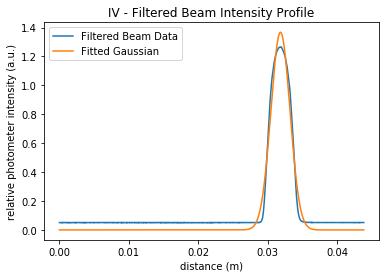

In [145]:
plt.plot(d1, vf,label ='Filtered Beam Data')
plt.plot(d1, gaussian(xvar, *popt),label = 'Fitted Gaussian')
plt.xlabel('distance (m)')
plt.ylabel('relative photometer intensity (a.u.)')
plt.title('IV - Filtered Beam Intensity Profile')
plt.legend()

sum(gaussian(xvar, *popt))

## [V] - $\textbf{Beam Intensity Profile of Un-Filtered Beam}$


In [146]:
v = pd.read_csv('StaunchEscoV.dat',sep='\s+', header=None, skiprows=1)
vvt = v[0][5:].values
vvv = v[1][5:].values

vvt = np.ndarray.tolist(vvt)
vvv = np.ndarray.tolist(vvv)

vvt = map(float,vvt)
vvv = map(float,vvv)

vvt = list(vvt)
vvv = list(vvv)

#plt.plot(vvt,vvv,'r:')
#plt.xlabel('time (s)')
#plt.ylabel('relative photometer intensity (a.u.)')
#plt.title('V -Intensity Profile of Filtered Beam')


### 2 - Converting Un-Filtered Beam Time Data to Distance

In [147]:
d2 = [t * v_b for t in vvt]


In [148]:
vvar = np.linspace(0,31,num=901)

popt2, _ = optimize.curve_fit(gaussian, vvar, vvv)

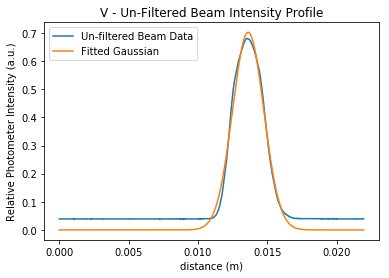

In [149]:
plt.plot(d2, vvv,label ='Un-filtered Beam Data')
plt.plot(d2, gaussian(vvar, *popt2),label = 'Fitted Gaussian')
plt.xlabel('distance (m)')
plt.ylabel('Relative Photometer Intensity (a.u.)')
plt.title('V - Un-Filtered Beam Intensity Profile')
plt.legend()



## [VII] - Single Slit Diffraction Modeling

In [150]:
vii = pd.read_csv('single_slit7.dat',sep='\s+', header=None, skiprows=1)

t_7 = vii[0][5:].values
v_7 = vii[1][5:].values

t_7 = np.ndarray.tolist(t_7)
v_7 = np.ndarray.tolist(v_7)

t_7 = map(float,t_7)
v_7 = map(float,v_7)

t_7 = list(t_7)
v_7 = list(v_7)

#converting time to distance

d7 = [t * v_b for t in t_7]

#converting distance to theta

L = 62.3 * 10**-2 

dis = np.asarray(d7)
L = np.asarray(L)
theta = np.arctan(dis/L)

theta1 = theta.tolist()

Text(0.5, 1.0, 'VII - Single-Slit Diffraction Pattern')

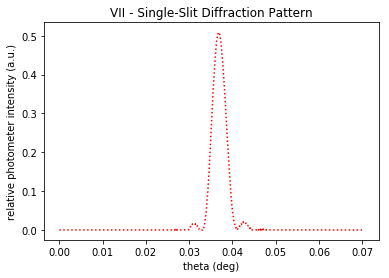

In [151]:
plt.plot(theta1,v_7,'r:')
plt.xlabel('theta (deg)')
plt.ylabel('relative photometer intensity (a.u.)')
plt.title('VII - Single-Slit Diffraction Pattern')


### Single-Slit Reference Equation 

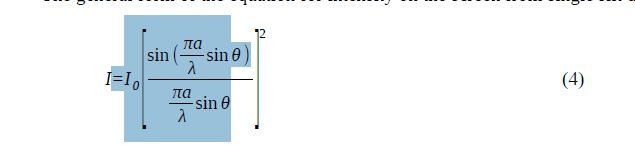

In [152]:
from IPython.display import Image
Image(filename='single_slit_eqn.png')

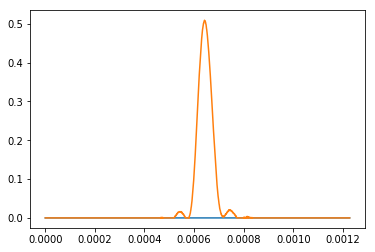

In [153]:
I_0 = max(v_7)
lam = 632.8*10**-9
a_s = .1*10**-2
d = 62.3*10**-2
theta = theta1[1:]
theta = [math.radians(theta) for theta in theta]

B = (np.pi*a_s*np.sin(theta))/(lam)




def single_slit(theta,I0,d,a_s,lam):
    
    
    B = (np.pi*a_s*np.sin(theta))/(lam)
    
    return I_0*(np.sin(B)/B)**2


  #  return I_0*((np.sin((np.sin(theta)*np.pi*a_s)/(lam)))/((np.sin(theta)*np.pi*a_s)/(lam)))**2


#top = (np.sin((np.sin(theta)*np.pi*a_s)/(lam)))
#bottom = ((np.sin(theta)*np.pi*a_s)/(lam))

#top[0]/bottom[0] 
fit_values = single_slit(theta,I_0,lam,a_s,d)

popt, pcov = optimize.curve_fit(single_slit, theta, v_7[1:])
plt.plot(theta, single_slit(theta, *popt))
#plt.plot(theta,v_7[1:])

#popt2, _ = optimize.curve_fit(single_slit, theta, I_0, lam , a_s, d, v_7)
#plt.plot(fit_values, v_7[1:]) 
plt.plot(theta,v_7[1:])


array([5.09000000e-01, 1.47864938e-04])

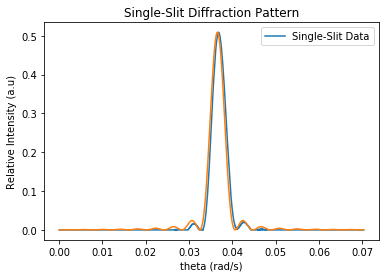

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def single_slit(t,I0,a_s):
    
    lam=632.8*10**-9
        
    return I_0*((np.sin((np.sin(t+os)*np.pi*a_s)/(lam)))/((np.sin(t+os)*np.pi*a_s)/(lam)))**2  

I_0 = max(v_7)
lam = 632.8*10**-9
#a_s = .0600e-1
a_s  =   0.000152
#a_s = .0500e-1
d = 62.3e-2
os = -.036
theta = theta1[1:]
#theta = [math.radians(theta) for theta in theta]
#t = np.linspace(-.1,.2,1800)
t = np.linspace(-.001,max(theta),1800)

SS = single_slit(t, I_0,a_s)


guess = np.array([I_0, a_s])
popt, pcov = curve_fit(single_slit,theta,v_7[1:],guess)


Sz = single_slit(t,I_0,a_s)

#plt.plot(t,single_slit(t,*popt))
plt.plot(theta,v_7[1:],label ='Single-Slit Data')
#plt.plot(theta,SS,label = 'Best-Fit Curve')
plt.xlabel('theta (rad/s)')
plt.ylabel('Relative Intensity (a.u)')
plt.title('Single-Slit Diffraction Pattern')
plt.legend()

plt.plot(theta,Sz)
popt

## [VIII] - Double-Slit Curve Fitting





=

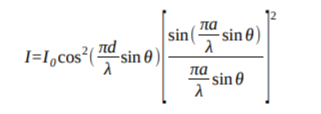

In [155]:
from IPython.display import Image
Image(filename='double_slit_eqn.png')

In [156]:
viii = pd.read_csv('double_slit.dat',sep='\s+', header=None, skiprows=1)

t_8 = viii[0][5:].values
v_8 = viii[1][5:].values

t_8 = np.ndarray.tolist(t_8)
v_8 = np.ndarray.tolist(v_8)

t_8 = map(float,t_8)
v_8 = map(float,v_8)

t_8 = list(t_8)
v_8 = list(v_8)

#converting time to distance

d8 = [t * v_b for t in t_8]

#converting distance to theta

L = 62.3 * 10**-2 

dis = np.asarray(d8)
L = np.asarray(L)
theta = np.arctan(dis/L)

theta8 = theta.tolist()

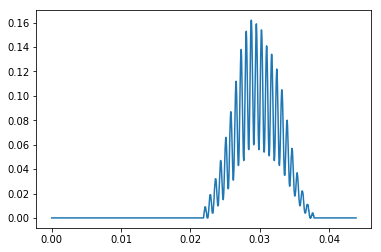

In [157]:
plt.plot(d8,v_8)


ValueError: x and y must have same first dimension, but have shapes (1801,) and (1800,)

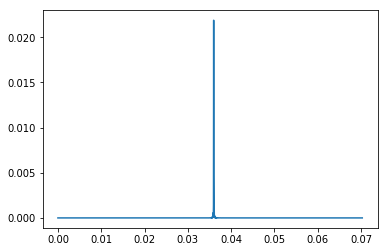

In [161]:
I_0 = max(v_7)
lam = 632.8*10**-9
a_s = .1*10**-2
d = 62.3*10**-2


def double_slit(t,I0,d,a_s,lam):
    
    
    B = (np.pi*a_s*np.sin(t))/(lam)
    
    return I_0*np.cos(B)**2*(np.sin(B)/B)**2


t_try = np.linspace(.01,.08,1801)
#top[0]/bottom[0] 
fit_values = double_slit(t,I_0,lam,a_s,d)

popt, pcov = optimize.curve_fit(single_slit, theta, v_7)
plt.plot(theta, single_slit(theta, *popt))
#plt.plot(theta,v_7[1:])

#popt2, _ = optimize.curve_fit(single_slit, theta, I_0, lam , a_s, d, v_7)
#plt.plot(fit_values, v_7[1:]) 
plt.plot(theta,v_7[1:])


### VIIII - Multi-Slit Diffraction - N=3

In [162]:
vx = pd.read_csv('multi_slit_3.dat',sep='\s+', header=None, skiprows=1)

t_s = vx[0][5:].values
v_s = vx[1][5:].values

t_s = np.ndarray.tolist(t_s)
v_s = np.ndarray.tolist(v_s)

t_s = map(float,t_s)
v_s = map(float,v_s)

t_s = list(t_s)
v_s = list(v_s)

dms = [t * v_b for t in t_s]

dms = np.asarray(dms)
L = np.asarray(L)
thetams = np.arctan(dis/L)



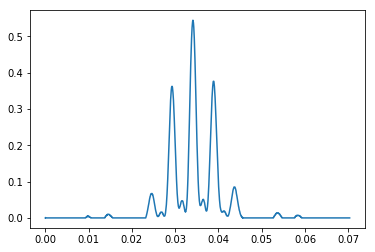

In [163]:
plt.plot(thetams,v_s)

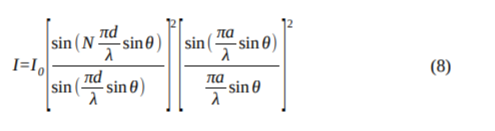

In [164]:
from IPython.display import Image
Image(filename='multi_slit_eqn.png')

[5.44000000e-01 9.20289586e-05 1.56666136e-04]


C:\Users\tatha\Anaconda3\envs\PythonV3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


Text(0.5, 0, '')

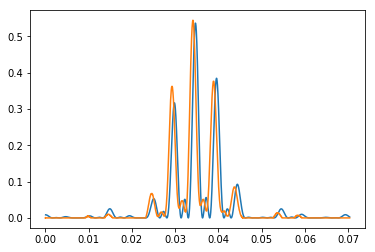

In [188]:
def multi_slit(t,I0,d,a_s):
    
    
    B = (np.pi*a_s*np.sin(t))/(632.8 *10**-9)
    C=(np.sin(t-offset)*np.pi*d)/(632.8 *10**-9)
    N=3
    
    return Im*(((np.sin(N*C)/np.sin(C))**2)*(np.sin(B)/(B))**2)
Im=  max(v_s)
a_s =32e-6
d = 90e-6
lam=632.8 *10**-9
offset=-.05

model_tms = np.linspace(-.05,.05,1800)

model_y = multi_slit(model_tms,Im,d,a_s)

guess1 = np.array([Im,d,a_s])

popt1, pcov1 = optimize.curve_fit(multi_slit, thetams[1:], v_s[1:],guess1)

print(popt1)

Sx = multi_slit(model_tms,*popt1)
#plt.plot(thetams[1:],Sx)
plt.plot(thetams[1:],model_y*.11)
plt.plot(thetams,v_s)
plt.xlabel('')

### VIIII - Multi-Slit Diffraction, N=4

In [36]:
vm4 = pd.read_csv('multi_slit4.dat',sep='\s+', header=None, skiprows=1)


tm4  = vm4[0][5:].values
vs4 = vm4[1][5:].values

tm4 = np.ndarray.tolist(tm4)
vs4 = np.ndarray.tolist(vs4)

tm4 = map(float,tm4)
vs4 = map(float,vs4)

tm4 = list(tm4)
vs4 = list(vs4)

dm4 = [t * v_b for t in tm4]

dm4 = np.asarray(dm4)
L4 = 60.9e-2

theta4 = np.arctan(dm4/L)




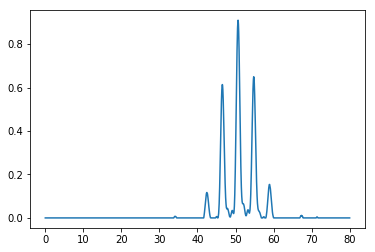

In [24]:
plt.plot(tm4,vs4)

[2.36760533e-03 1.27921417e-04 1.53834732e-05]


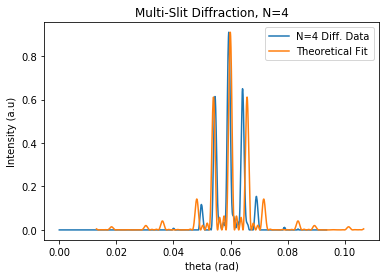

In [85]:
def multi_slit4(t,I0,d,a_s):
    
    
    B = (np.pi*a_s*np.sin(t-offset))/(632.8 *10**-9)
    C=(np.sin(t-offset)*np.pi*d)/(632.8 *10**-9)
    N=4
    
    return I0*(((np.sin(N*C)/np.sin(C))**2)*(np.sin(B)/(B))**2)

Im4=  max(vs4)/(4**2)
a_s =34.2e-6
d = 100e-6
lam=632.8 *10**-9
offset=0

model_tms4 = np.linspace(-.05,.05,2401)

model_y4 = multi_slit4(model_tms4,Im4,d,a_s)

guess4 = np.array([Im4,d,a_s])

popt4, pcov4 = optimize.curve_fit(multi_slit4, theta4[1:], vs4[1:],guess4)

print(popt4)
Sxt = multi_slit4(model_tms4,Im4,d,a_s)
Sx4 = multi_slit4(model_tms4-.013,*popt4)
#plt.plot(theta4[1:],Sx4[1:])
#plt.plot(model_tms4,model_y4*.11)
plt.plot(theta4[1:],vs4[1:],label = 'N=4 Diff. Data')
plt.plot(theta4[1:]+.013,Sxt[1:],label = 'Theoretical Fit')
plt.xlabel('theta (rad)')
plt.ylabel('Intensity (a.u)')
plt.title('Multi-Slit Diffraction, N=4')
plt.legend()

In [41]:
vm5 = pd.read_csv('multi_slit5.dat',sep='\s+', header=None, skiprows=1)

tm5  = vm5[0][5:].values
vs5 = vm5[1][5:].values

tm5 = np.ndarray.tolist(tm5)
vs5 = np.ndarray.tolist(vs5)

tm5 = map(float,tm5)
vs5 = map(float,vs5)

tm5 = list(tm5)
vs5 = list(vs5)

dm5 = [t * v_b for t in tm5]

dm5 = np.asarray(dm5)
L5 = 60.9e-2

theta5 = np.arctan(dm5/L)


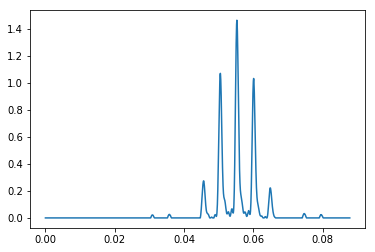

In [42]:
plt.plot(theta5,vs5)

[8.51912463e-04 9.16414104e-05 2.82599518e-05]


C:\Users\tatha\Anaconda3\envs\PythonV3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


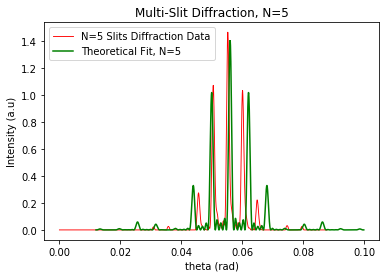

In [86]:
def multi_slit5(t,I0,d,a_s):
    
    
    B = (np.pi*a_s*np.sin(t-offset))/(632.8 *10**-9)
    C=(np.sin(t-offset)*np.pi*d)/(632.8 *10**-9)
    N=5
    
    return I0*(((np.sin(N*C)/np.sin(C))**2)*(np.sin(B)/(B))**2)

Im5=  max(vs5)/(5**2)
a_s = 43.2e-6
d = .0065e-2
lam=632.8e-9
offset=0

model_tms5 = np.linspace(-.05,.05,2251)

model_y5 = multi_slit4(model_tms5,Im5,d,a_s)

guess5 = np.array([Im5,d,a_s])

popt5, pcov5 = optimize.curve_fit(multi_slit5, theta5[1:], vs5[1:],guess5)
np.asarray(theta5)
print(popt5)
Sxt5 = multi_slit5(model_tms5,Im5,d,a_s)
Sx5 = multi_slit5(model_tms5,*popt5)
#plt.plot(model_tms5,model_y5*.11)
plt.plot(theta5[1:],vs5[1:],label = 'N=5 Slits Diffraction Data',color = 'r',linewidth = '.9')
plt.plot(theta5[1:]+.012,Sx5[1:]*66, label = 'Theoretical Fit, N=5',color = 'g')
#plt.plot(theta5[1:],Sx5[1:]*50, label = 'Theoretical Fit, N=5',color = 'g')
plt.xlabel('theta (rad)')
plt.ylabel('Intensity (a.u)')
plt.title('Multi-Slit Diffraction, N=5')
plt.legend()

### [ X ] - Circular Aperture

In [44]:
circ = pd.read_csv('circ_aperatureX.dat',sep='\s+', header=None, skiprows=1)


ctx  = circ[0][5:].values
cvx = circ[1][5:].values

ctx = np.ndarray.tolist(ctx)
cvx = np.ndarray.tolist(cvx)

ctx = map(float,ctx)
cvx = map(float,cvx)

ctx = list(ctx)
cvx = list(cvx)

dmx = [t * v_b for t in ctx]

dmx = np.asarray(dmx)
L5x = 60.9e-2

thetax = np.arctan(dmx/L5x)

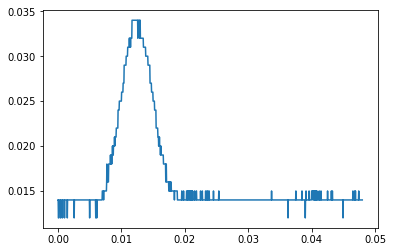

In [45]:
plt.plot(thetax,cvx)

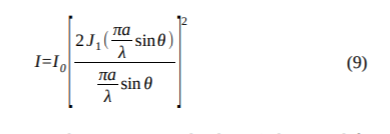

In [46]:
from IPython.display import Image
Image(filename='circ_eqn.png')

#special.jv(1,1)



[-8.04965126e-06  1.18577575e-02]


C:\Users\tatha\Anaconda3\envs\PythonV3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


0.014

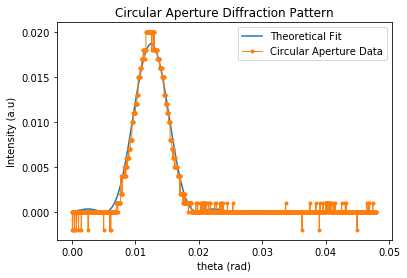

In [109]:
def circular_diffraction(theta,a,offset):
    
    I0=  max(cvx)*.55
    lam=632.8e-9
    
    return I0*(2*special.jv(1,(np.pi*a*np.sin(theta-offset))/lam)/(np.sin(theta-offset)*np.pi*a/lam))**2

dc = 60.5e-2
a = .5e-4
offset = -.024
xspace = np.linspace(-.05,.05,1201)
yspace = circular_diffraction(xspace,a,offset)
cvx = np.asarray(cvx)

        
        


guessx = np.array([a,offset])
poptx, pcovx = optimize.curve_fit(circular_diffraction, thetax, cvx,guessx,maxfev=2000)

print(poptx)

#plt.plot(thetax,circular_diffraction(xspace, *poptx))

plt.plot(thetax,yspace,label = 'Theoretical Fit')
plt.plot(thetax,cvx-.014,linewidth ='1.0',marker ='.', label = 'Circular Aperture Data')
plt.xlabel('theta (rad)')
plt.ylabel('Intensity (a.u)')
plt.title('Circular Aperture Diffraction Pattern')
plt.legend()
cvx[0]

### [XI] - Diffraction Gratings

In [48]:
diff1 = pd.read_csv('diffraction_grating_100_final.dat',sep='\s+', header=None, skiprows=1)
diff3 = pd.read_csv('diff_grating_300.dat',sep = '\s+', header=None, skiprows=1)
diff6 = pd.read_csv('diff_grating_600.dat',sep='\s+', header=None, skiprows=1)



In [59]:
dt1 = diff1[0][5:].values
dv1 = diff1[1][5:].values

dt3 = diff3[0][5:].values
dv3 = diff3[1][5:].values

dt6 = diff6[0][5:].values
dv6 = diff6[1][5:].values

d1_list = np.ndarray.tolist(dt1)
v1_list = np.ndarray.tolist(dv1)


d3_list = np.ndarray.tolist(dt3)
v3_list = np.ndarray.tolist(dv3)

d6_list = np.ndarray.tolist(dt6)
v6_list = np.ndarray.tolist(dv6)


d1_list = map(float,d1_list)
v1_list = map(float,v1_list)

d3_list = map(float,d3_list)
v3_list = map(float,v3_list)

d6_list = map(float,d6_list)
v6_list = map(float,v6_list)


d1_list = list(d1_list)
v1_list = list(v1_list)

d3_list = list(d3_list)
v3_list = list(v3_list)

d6_list = list(d6_list)
v6_list = list(v6_list)


diff_dist1 = [t * v_b for t in d1_list]
diff_dist3 = [t * v_b for t in d3_list]
diff_dist6 = [t * v_b for t in d6_list]
#di = 160e-3




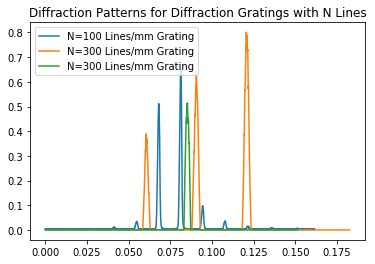

In [90]:
plt.plot(diff_dist1,v1_list,label = 'N=100 Lines/mm Grating')
plt.plot(diff_dist3,v3_list,label = 'N=300 Lines/mm Grating')
plt.plot(diff_dist6,v6_list,label = 'N=300 Lines/mm Grating')
plt.title('Diffraction Patterns for Diffraction Gratings with N Lines')
plt.legend()